<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Regressions/Linear_Regression_ML_Medical_Cost_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import seaborn as sns

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


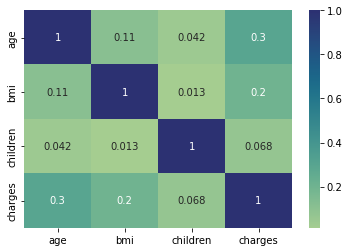

In [108]:
sns.heatmap(dataset.corr(),annot = True,cmap="crest")

## Feature Scaling

In [14]:
column_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown = "ignore"),['sex','smoker','region']),
    (MinMaxScaler(),['age','bmi','children'])
                                            
        )

In [110]:
x = dataset.drop(['charges'],axis = 1)
y = dataset['charges']

In [111]:
column_transformer.fit(x)

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children'])])

In [112]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [113]:
x_train_scaled = column_transformer.transform(x_train)
x_val_scaled = column_transformer.transform(x_val)

In [114]:
x_train.shape


(1070, 6)

## Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize = True,n_jobs = 12)
model.fit(x_train_scaled,y_train)

LinearRegression(n_jobs=12, normalize=True)

In [116]:

y_pred = model.predict(x_val_scaled)

In [117]:
model.score(x_val_scaled,y_val)

0.783486491243026

## Lazy Predict

In [54]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from lazypredict.Supervised import LazyRegressor

In [56]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )

In [118]:
models,prediction = reg.fit(x_train_scaled,x_val,y_train,y_val)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  5%|▍         | 2/42 [00:00<00:02, 15.76it/s]

AdaBoostRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
BaggingRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
BayesianRidge model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
DecisionTreeRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.


 12%|█▏        | 5/42 [00:00<00:01, 19.96it/s]

DummyRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
ElasticNet model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.


 17%|█▋        | 7/42 [00:00<00:02, 14.76it/s]

ElasticNetCV model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
ExtraTreeRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.


 21%|██▏       | 9/42 [00:00<00:03,  8.48it/s]

ExtraTreesRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
GammaRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.


 26%|██▌       | 11/42 [00:01<00:03,  8.75it/s]

GaussianProcessRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
GradientBoostingRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.


 38%|███▊      | 16/42 [00:01<00:03,  8.53it/s]

HistGradientBoostingRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
HuberRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
KNeighborsRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
KernelRidge model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
Lars model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
LarsCV model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
Lasso model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.


 48%|████▊     | 20/42 [00:01<00:01, 11.88it/s]

LassoCV model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
LassoLars model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
LassoLarsCV model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
LassoLarsIC model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
LinearRegression model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
LinearSVR model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.


 67%|██████▋   | 28/42 [00:03<00:02,  6.52it/s]

MLPRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
NuSVR model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
OrthogonalMatchingPursuit model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
OrthogonalMatchingPursuitCV model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
PassiveAggressiveRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
PoissonRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.


 79%|███████▊  | 33/42 [00:55<00:36,  4.10s/it]

QuantileRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
RANSACRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.


 90%|█████████ | 38/42 [00:55<00:08,  2.11s/it]

RandomForestRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
Ridge model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
RidgeCV model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
SGDRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
SVR model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
TransformedTargetRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
TweedieRegressor model failed to execute

100%|██████████| 42/42 [00:56<00:00,  1.34s/it]


X has 6 features, but ColumnTransformer is expecting 11 features as input.
[16:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.
LGBMRegressor model failed to execute
X has 6 features, but ColumnTransformer is expecting 11 features as input.


In [58]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.87,0.88,4324.80,0.35
XGBRegressor,0.87,0.88,4351.19,0.21
RandomForestRegressor,0.86,0.86,4587.72,0.45
LGBMRegressor,0.86,0.86,4601.62,0.11
HistGradientBoostingRegressor,0.86,0.86,4637.54,2.24
BaggingRegressor,0.85,0.85,4801.36,0.08
ExtraTreesRegressor,0.84,0.84,4943.95,0.88
AdaBoostRegressor,0.81,0.82,5267.06,0.07
KNeighborsRegressor,0.79,0.80,5583.38,0.02


## Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
model_2 = GradientBoostingRegressor(loss = "huber",learning_rate = 0.1,n_estimators = 500)
model_2.fit(x_train_scaled,y_train)

GradientBoostingRegressor(loss='huber', n_estimators=500)

In [120]:
model_2.score(x_val_scaled,y_val)

0.8603402723833068

In [121]:
y_pred = model_2.predict(x_val_scaled)

### Parameter Tuning

In [122]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'max_features':[10,9,5]
             }
grid = GridSearchCV(GradientBoostingRegressor(),param_grid,refit = True, verbose = 3, n_jobs=-1)


In [123]:
from sklearn.compose import TransformedTargetRegressor

model_2_transformed = TransformedTargetRegressor(regressor = grid)

In [124]:
model_2_transformed.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


TransformedTargetRegressor(regressor=GridSearchCV(estimator=GradientBoostingRegressor(),
                                                  n_jobs=-1,
                                                  param_grid={'max_depth': [7,
                                                                            8],
                                                              'max_features': [10,
                                                                               9,
                                                                               5],
                                                              'n_estimators': [100,
                                                                               80,
                                                                               60,
                                                                               55,
                                                                               51,
                           

In [125]:
model_2_transformed.score(x_val_scaled,y_val)

0.8623143608261516

## RandomForestRegressor

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
model_3 = RandomForestRegressor()
model_3.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [127]:
model_3.score(x_val_scaled,y_val)

0.8630625495590794

In [129]:
y_pred = model_3.predict(x_val_scaled)

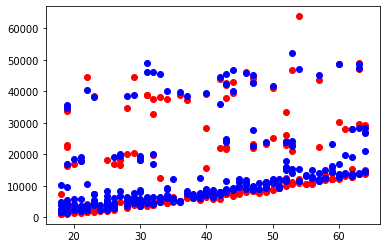

In [137]:
plt.scatter(x_val['age'],y_val,color = 'red')
plt.scatter(x_val['age'],y_pred,color = 'blue')